In [1]:
import dataset_creation as dc
import model_pipeline as mp
import model_testing as mt
import outlier_removal as outrem
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
color = input('Color')
year = input('Year')
month = input('Month')
url = 'https://d37ci6vzurychx.cloudfront.net/trip-data/'+color+'_tripdata_'+year+'-'+month+'.parquet'
df = pd.read_parquet(url)
df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
df['duration'] = None
df['duration']= df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df['duration'] = df['duration'].dt.total_seconds()/60


Color green
Year 2021
Month 01


In [3]:
categorical = ['PULocationID','DOLocationID']
numerical = ['trip_distance']
target = 'duration'
df[categorical] = df[categorical].astype(str)

In [4]:
df_train = df[categorical + numerical]

In [5]:
dv = DictVectorizer()
train_dict = df_train.to_dict(orient='records')    
X_train = dv.fit_transform(train_dict)


y_train = df[target].values

# 1. Initialize the model
model = LinearRegression()

# 2. Train the model
model.fit(X_train, y_train)


# 3. Make predictions
y_pred = model.predict(X_train)


Mean Squared Error: 58.86
R² Score: 0.02


/tmp/ipykernel_112778/2043300619.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/home/codespace/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_112778/2043300619.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level

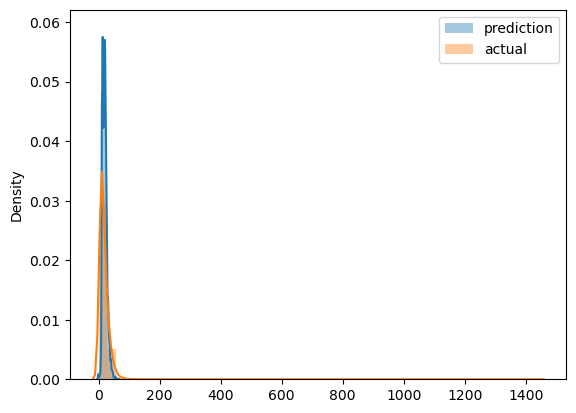

In [8]:
# 4. Evaluate the model
mse = mean_squared_error(y_train, y_pred, squared=False)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()